# 4. Python Data Wrangling I

_Damian Trilling and Penny Sheets_

This notebook outlines the

- (3) Enrichment
- (4) Analysis

of two CBS datasets. We made a different notebook
(`5. Python Data Wrangling II`) that helps you reconstructing how we did the

- (1) Retrieval
- (2) Preprocessing

to construct the files for this examples.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Obtain both datasets by either working through Notebook 5. or by downloading
both files from here:

- [population.json](https://github.com/FeLoe/data_journalism/blob/master/datasets/population.json)
- [economy.json](https://github.com/FeLoe/data_journalism/blob/master/datasets/economy.json)


In [2]:
population=pd.read_json('population.json')
economy=pd.read_json('economy.json')

# Your Task

- use methods like `.head()`, `.describe()` and/or `.value_counts()` to get a
  sense of both datasets.
- what are the common characteristics between the datasets, what are the
  differences?


In [3]:
# your code here

In [4]:
population.head()

,Regions,Periods,LiveBornChildren_3,NetMigrationIncludingAdministrative_17
0,Groningen,1942,8564.0,-2106.0
1,Groningen,1943,9589.0,-1201.0
2,Groningen,1944,9802.0,-931.0
3,Groningen,1945,9872.0,-2559.0
4,Groningen,1946,12790.0,-3851.0


In [5]:
economy.head()

,Regions,Periods,GDPVolumeChanges_1
0,Groningen,1996,9.3
1,Groningen,1997,-2.0
2,Groningen,1998,-0.9
3,Groningen,1999,-0.7
4,Groningen,2000,1.5


In [6]:
population['Periods'].value_counts()

Periods
1942    12
2003    12
2001    12
2000    12
1999    12
        ..
1968    12
1967    12
1966    12
1965    12
2023    12
Name: count, Length: 82, dtype: int64

In [7]:
population.describe()

,Periods,LiveBornChildren_3,NetMigrationIncludingAdministrative_17
count,984.000000,940.000000,940.000000
mean,1982.500000,17684.945745,1889.707447
std,23.681637,12854.180927,6770.561808
min,1942.000000,3357.000000,-65049.000000
25%,1962.000000,6726.750000,-975.250000
50%,1982.500000,13541.500000,1163.500000
75%,2003.000000,26504.750000,3965.000000
max,2023.000000,69540.000000,47459.000000


In [8]:
economy['Regions'].value_counts().sort_index()

Regions
Drenthe          22
Flevoland        22
Friesland        22
Gelderland       22
Groningen        22
Limburg          22
Noord-Brabant    22
Noord-Holland    22
Overijssel       22
Utrecht          22
Zeeland          22
Zuid-Holland     22
Name: count, dtype: int64

# Discuss: What type of join?

Discuss with your neighbor

- what type of join (inner, outer, left, right) you want; and
- which column(s) to join on

Then, create a combined dataframe with a command along the lines of

```
df = population.merge(economy, on='columnname'], how='left/right/inner/outer')
```

or if you have multiple columns to join on:

```
df = population.merge(economy, on=['columnname','columnname'], how='left/right/inner/outer')
```


In [9]:
df = economy.merge(population, on= ['Periods', 'Regions'], how='left')

In [10]:
df

,Regions,Periods,GDPVolumeChanges_1,LiveBornChildren_3,NetMigrationIncludingAdministrative_17
0,Groningen,1996,9.3,6148.0,-616.0
1,Groningen,1997,-2.0,6336.0,-952.0
2,Groningen,1998,-0.9,6472.0,992.0
3,Groningen,1999,-0.7,6515.0,1706.0
4,Groningen,2000,1.5,6510.0,2784.0
...,...,...,...,...,...
259,Limburg,2013,-0.7,9011.0,159.0
260,Limburg,2014,0.2,8841.0,45.0
261,Limburg,2015,2.7,8739.0,1406.0
262,Limburg,2016,2.2,8994.0,3865.0


Then, give some information about the resulting dataframe.


In [11]:
# your code here

In [12]:
df.describe()

,Periods,GDPVolumeChanges_1,LiveBornChildren_3,NetMigrationIncludingAdministrative_17
count,264.000000,264.000000,264.000000,264.000000
mean,2006.500000,1.954924,15572.280303,2205.647727
std,6.356339,2.875221,11710.891211,4459.382786
min,1996.000000,-8.300000,3439.000000,-16599.000000
25%,2001.000000,0.300000,5582.000000,-143.000000
50%,2006.500000,2.250000,12096.000000,1328.000000
75%,2012.000000,3.525000,24250.000000,3514.000000
max,2017.000000,11.400000,44022.000000,22523.000000


In [13]:
df

,Regions,Periods,GDPVolumeChanges_1,LiveBornChildren_3,NetMigrationIncludingAdministrative_17
0,Groningen,1996,9.3,6148.0,-616.0
1,Groningen,1997,-2.0,6336.0,-952.0
2,Groningen,1998,-0.9,6472.0,992.0
3,Groningen,1999,-0.7,6515.0,1706.0
4,Groningen,2000,1.5,6510.0,2784.0
...,...,...,...,...,...
259,Limburg,2013,-0.7,9011.0,159.0
260,Limburg,2014,0.2,8841.0,45.0
261,Limburg,2015,2.7,8739.0,1406.0
262,Limburg,2016,2.2,8994.0,3865.0


## Setting an index

While our columns have a descriptive names (headers), our rows don't right now.
They are just numbers. However, we could actually give them _meaningful_ names.
A nice side-effect is that you will get better plots, with meaningful axis
labels later on.


In [14]:
df.index=df['Periods']

See the difference?


In [15]:
df.head()

,Regions,Periods,GDPVolumeChanges_1,LiveBornChildren_3,NetMigrationIncludingAdministrative_17
Periods,,,,,
1996,Groningen,1996,9.3,6148.0,-616.0
1997,Groningen,1997,-2.0,6336.0,-952.0
1998,Groningen,1998,-0.9,6472.0,992.0
1999,Groningen,1999,-0.7,6515.0,1706.0
2000,Groningen,2000,1.5,6510.0,2784.0


## Analyze the data

Let's train a bit with `.groupby()` and `.agg()`.


<Axes: xlabel='Periods'>

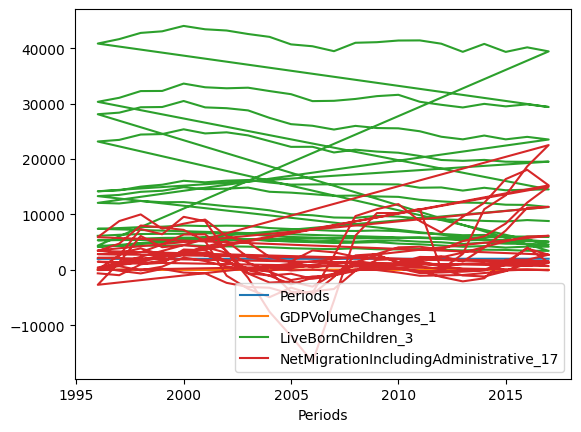

In [16]:
df.plot()

<Axes: xlabel='Periods'>

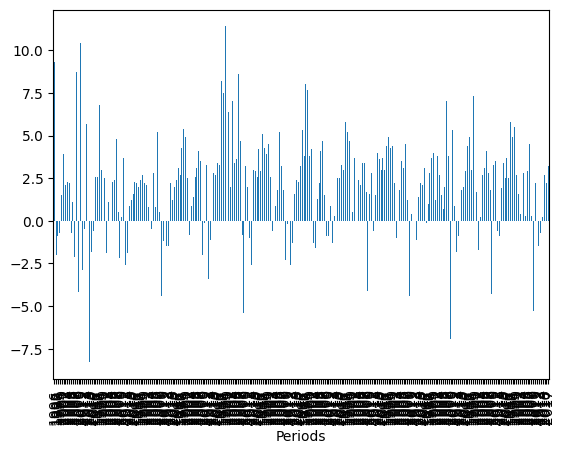

In [17]:
df['GDPVolumeChanges_1'].plot(kind='bar')

## Discuss: Why does the above not work?


OK, got it?

Let's try this instead:


/var/folders/l0/0m8rr1_910j7vgvw7jz29qgc0000gn/T/ipykernel_9408/611293225.py:2: FutureWarning: The provided callable <function mean at 0x1172ebba0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  'Regions').agg(np.mean).plot(kind='bar')


<Axes: xlabel='Regions'>

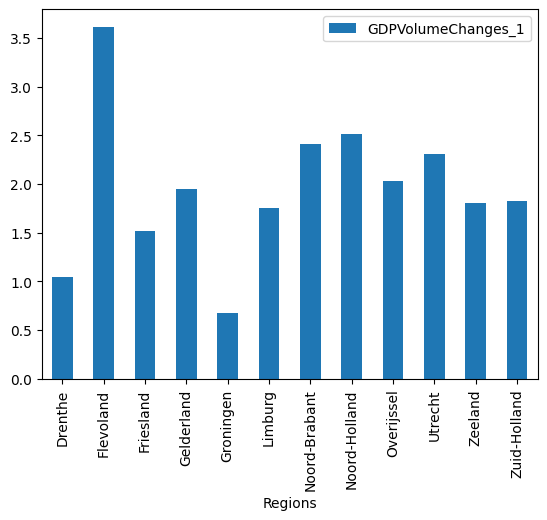

In [18]:
df[['GDPVolumeChanges_1','Regions']].groupby(
    'Regions').agg(np.mean).plot(kind='bar')

In [19]:
df.columns

Index(['Regions', 'Periods', 'GDPVolumeChanges_1', 'LiveBornChildren_3',
       'NetMigrationIncludingAdministrative_17'],
      dtype='object')

/var/folders/l0/0m8rr1_910j7vgvw7jz29qgc0000gn/T/ipykernel_9408/3909273154.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['LiveBornChildren_3'].groupby('Periods').agg(sum).plot()


<Axes: xlabel='Periods'>

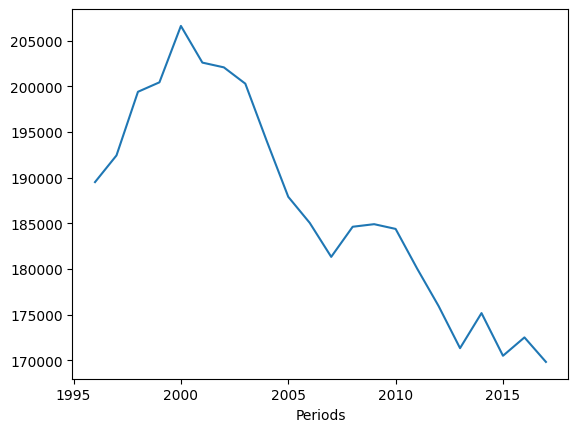

In [20]:
df['LiveBornChildren_3'].groupby('Periods').agg(sum).plot()

## Discuss: which aggregation function?

- Why did we choose `np.mean`?
- What function should we choose for analyzing `df['LiveBornChildren_3']`? Why?


### Some more example code for plotting, feel free to play around

Pay attention to what works well and what doesn't, and how you can use

- groupby and/or
- subsetting

to make plots clearer.


Regions
Drenthe          Axes(0.125,0.11;0.775x0.77)
Flevoland        Axes(0.125,0.11;0.775x0.77)
Friesland        Axes(0.125,0.11;0.775x0.77)
Gelderland       Axes(0.125,0.11;0.775x0.77)
Groningen        Axes(0.125,0.11;0.775x0.77)
Limburg          Axes(0.125,0.11;0.775x0.77)
Noord-Brabant    Axes(0.125,0.11;0.775x0.77)
Noord-Holland    Axes(0.125,0.11;0.775x0.77)
Overijssel       Axes(0.125,0.11;0.775x0.77)
Utrecht          Axes(0.125,0.11;0.775x0.77)
Zeeland          Axes(0.125,0.11;0.775x0.77)
Zuid-Holland     Axes(0.125,0.11;0.775x0.77)
Name: GDPVolumeChanges_1, dtype: object

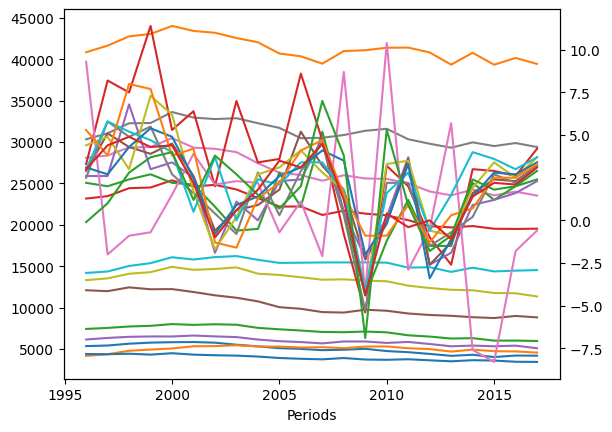

In [21]:
df.groupby('Regions')['LiveBornChildren_3'].plot()
df.groupby('Regions')['GDPVolumeChanges_1'].plot(secondary_y=True)

/var/folders/l0/0m8rr1_910j7vgvw7jz29qgc0000gn/T/ipykernel_9408/2519802987.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(df.index)['LiveBornChildren_3'].agg(sum).plot(legend = True)
/var/folders/l0/0m8rr1_910j7vgvw7jz29qgc0000gn/T/ipykernel_9408/2519802987.py:2: FutureWarning: The provided callable <function mean at 0x1172ebba0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(df.index)['GDPVolumeChanges_1'].agg(np.mean).plot(legend=True, secondary_y=True)


<Axes: >

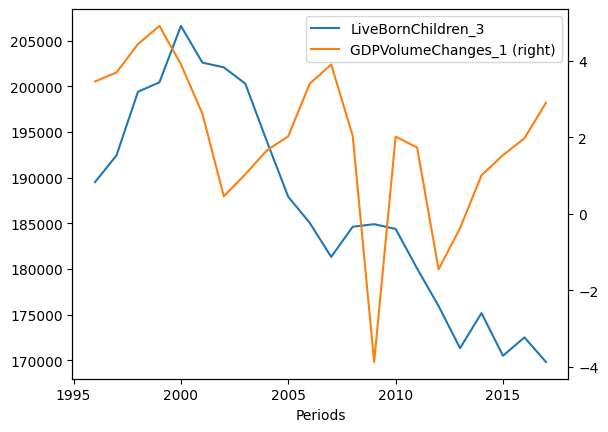

In [22]:
df.groupby(df.index)['LiveBornChildren_3'].agg(sum).plot(legend = True)
df.groupby(df.index)['GDPVolumeChanges_1'].agg(np.mean).plot(legend=True, secondary_y=True)

Regions
Drenthe          Axes(0.125,0.11;0.775x0.77)
Flevoland        Axes(0.125,0.11;0.775x0.77)
Friesland        Axes(0.125,0.11;0.775x0.77)
Gelderland       Axes(0.125,0.11;0.775x0.77)
Groningen        Axes(0.125,0.11;0.775x0.77)
Limburg          Axes(0.125,0.11;0.775x0.77)
Noord-Brabant    Axes(0.125,0.11;0.775x0.77)
Noord-Holland    Axes(0.125,0.11;0.775x0.77)
Overijssel       Axes(0.125,0.11;0.775x0.77)
Utrecht          Axes(0.125,0.11;0.775x0.77)
Zeeland          Axes(0.125,0.11;0.775x0.77)
Zuid-Holland     Axes(0.125,0.11;0.775x0.77)
Name: NetMigrationIncludingAdministrative_17, dtype: object

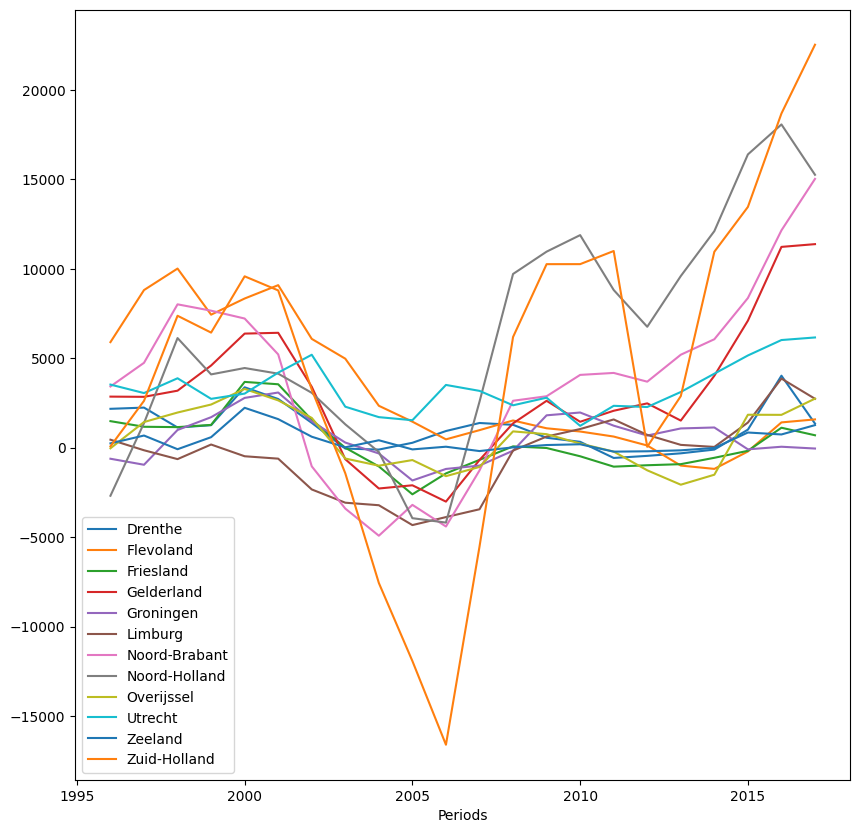

In [23]:
df.groupby('Regions')['NetMigrationIncludingAdministrative_17'].plot(legend=True, figsize = [10,10] )

<Axes: xlabel='Periods'>

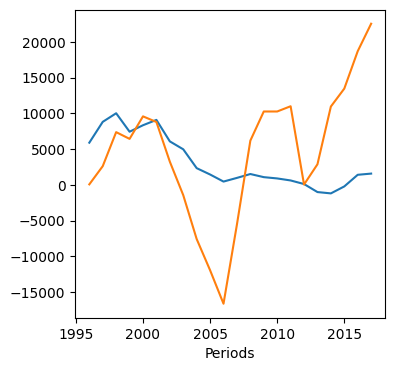

In [24]:
df[df['Regions']=='Flevoland']['NetMigrationIncludingAdministrative_17'].plot(legend=False, figsize = [4,4] )
df[df['Regions']=='Zuid-Holland']['NetMigrationIncludingAdministrative_17'].plot(legend=False )

In [25]:
df['Regions']=='Flevoland'

Periods
1996    False
1997    False
1998    False
1999    False
2000    False
        ...  
2013    False
2014    False
2015    False
2016    False
2017    False
Name: Regions, Length: 264, dtype: bool

/var/folders/l0/0m8rr1_910j7vgvw7jz29qgc0000gn/T/ipykernel_9408/2097540005.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(df.index)['NetMigrationIncludingAdministrative_17'].agg(sum).plot(legend = True)
/var/folders/l0/0m8rr1_910j7vgvw7jz29qgc0000gn/T/ipykernel_9408/2097540005.py:2: FutureWarning: The provided callable <function mean at 0x1172ebba0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(df.index)['GDPVolumeChanges_1'].agg(np.mean).plot(legend=True, secondary_y=True)


<Axes: >

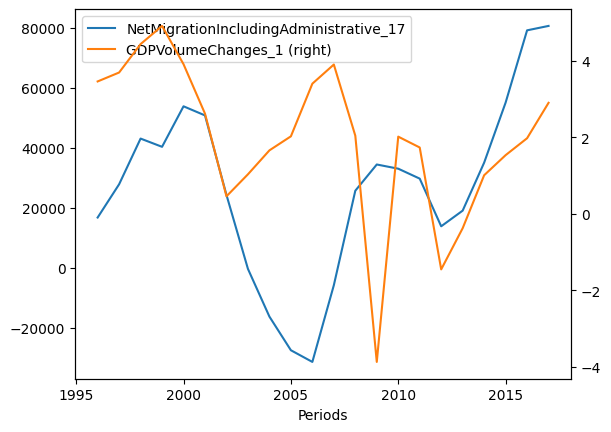

In [26]:
df.groupby(df.index)['NetMigrationIncludingAdministrative_17'].agg(sum).plot(legend = True)
df.groupby(df.index)['GDPVolumeChanges_1'].agg(np.mean).plot(legend=True, secondary_y=True)

### Discuss

I personally find this last plot a pretty cool one. Do you agree?


In [27]:
df[['NetMigrationIncludingAdministrative_17','GDPVolumeChanges_1']].corr() # we probably should have lagged one of the variables by a year or so for this.

,NetMigrationIncludingAdministrative_17,GDPVolumeChanges_1
NetMigrationIncludingAdministrative_17,1.00000,0.14411
GDPVolumeChanges_1,0.14411,1.00000


## Correlational analysis

We could also look into some bivariate plots....


<Axes: xlabel='GDPVolumeChanges_1', ylabel='LiveBornChildren_3'>

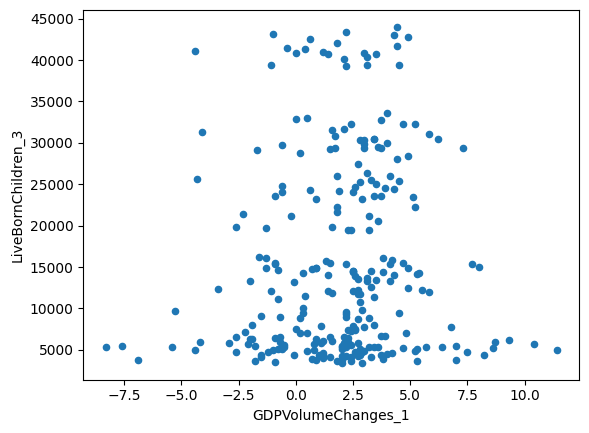

In [28]:
df.plot(y='LiveBornChildren_3', x='GDPVolumeChanges_1', kind='scatter')

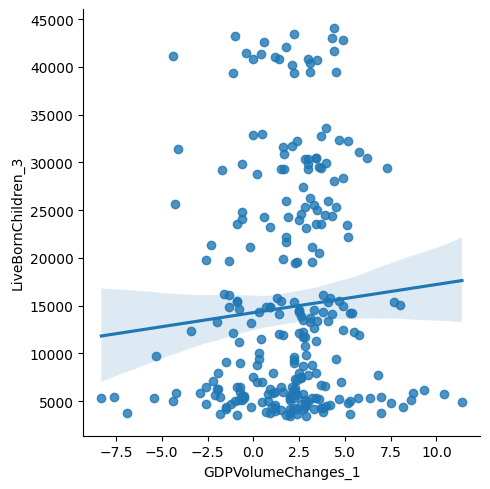

In [29]:
sns.lmplot(y='LiveBornChildren_3', x='GDPVolumeChanges_1', data=df,
           fit_reg=True, lowess=False, robust=True) 